In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [27]:
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### 1.Load Data

In [3]:
house = pd.read_csv(r"C:\Users\Shaik Shameer\Desktop\housing.csv\housing.csv")

In [4]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2.Handling missing value

In [8]:
house[house['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


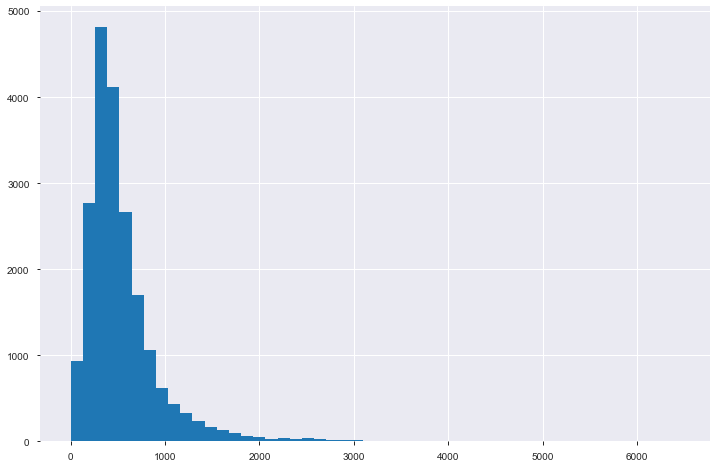

In [9]:
total_bedrooms = house[house['total_bedrooms'].notnull()]['total_bedrooms']
total_bedrooms.hist(figsize=(12,8),bins=50)

In [11]:
house['total_bedrooms'].replace(np.nan,method='ffill',inplace=True)

In [12]:
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

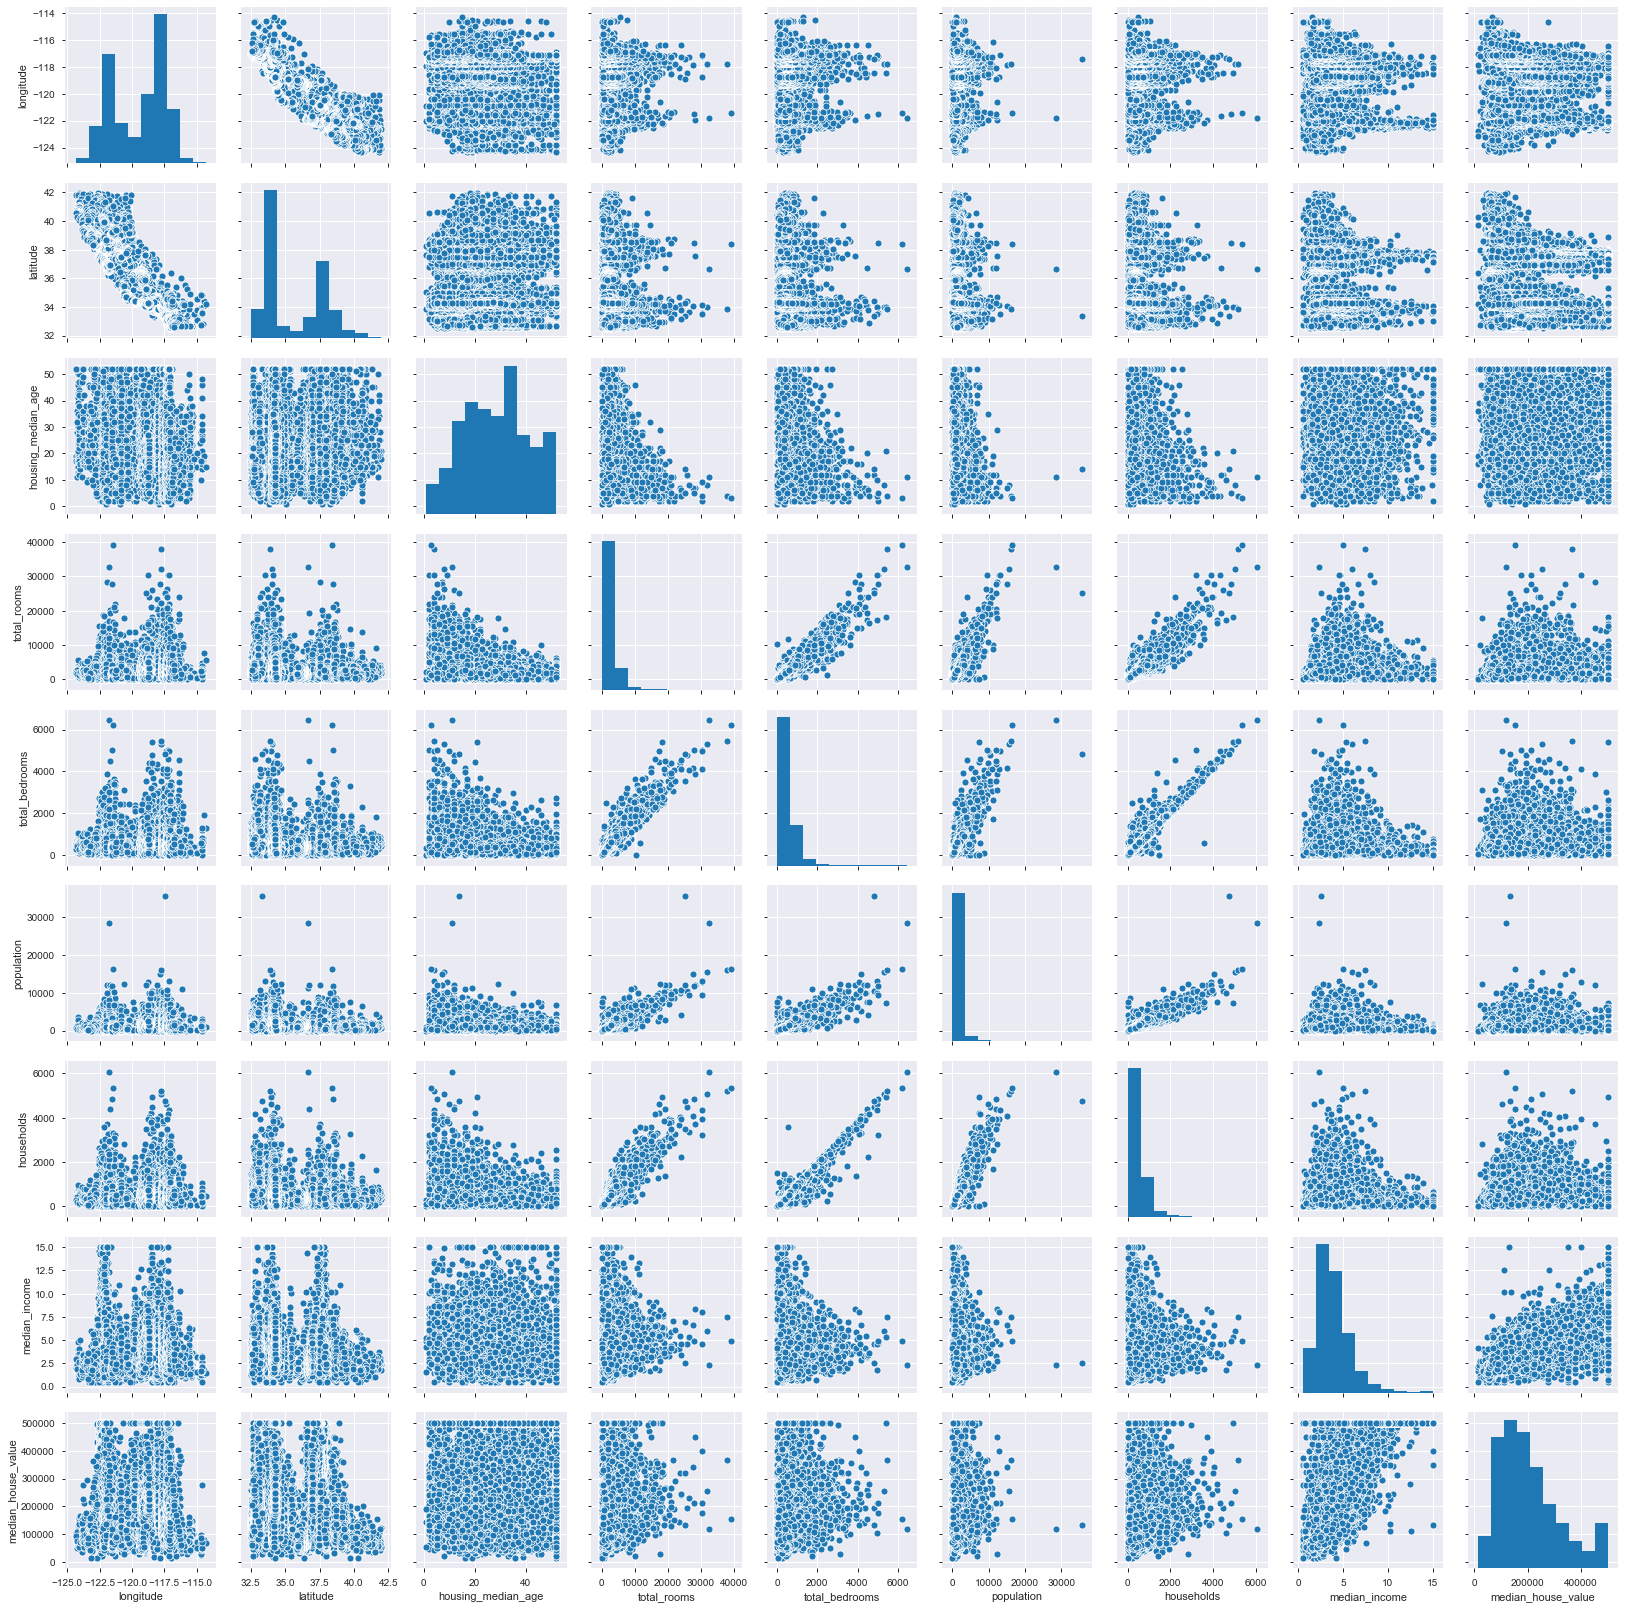

In [13]:
sns.pairplot(house)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B15B86A08>,
      dtype=object)

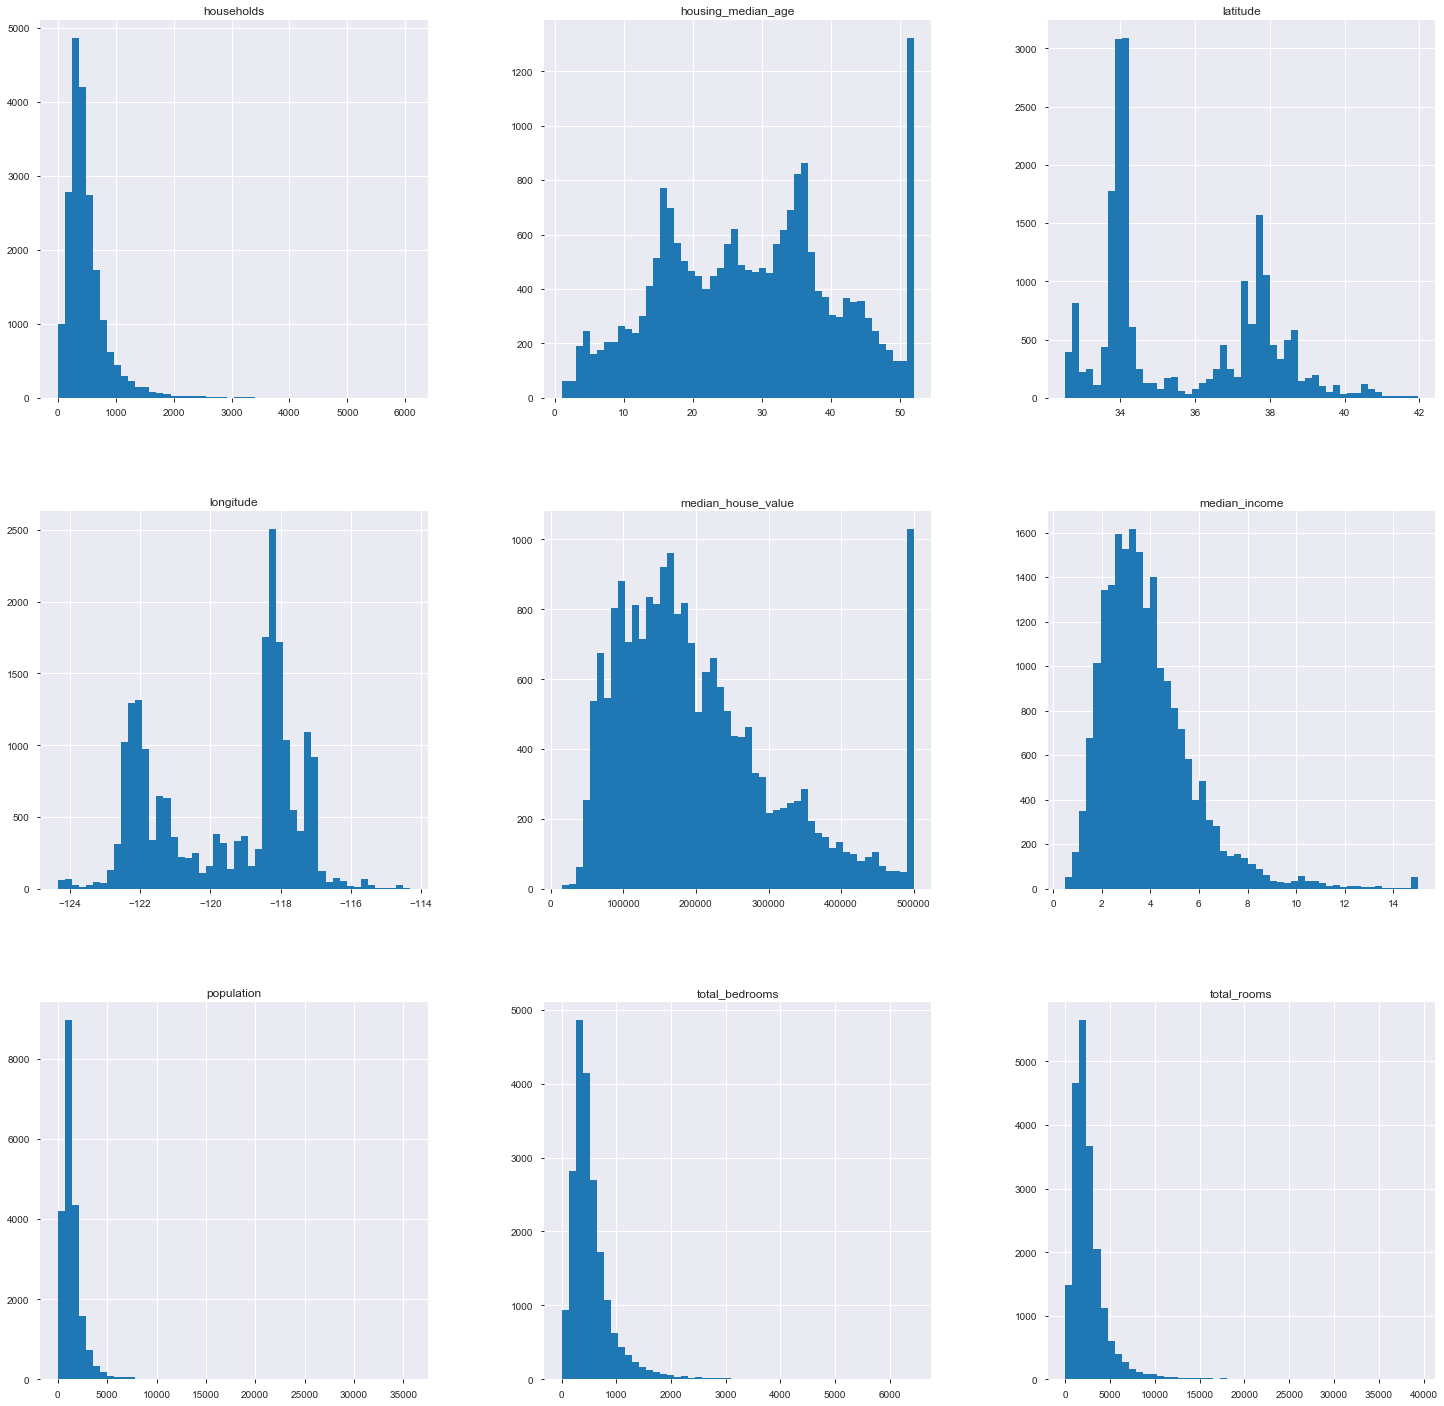

In [14]:
house.hist(figsize=(25,25),bins=50)

In [15]:
house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.070442,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.067535,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319312,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925347,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.070442,-0.067535,-0.319312,0.925347,1.000000,0.872491,0.972942,-0.007473,0.049294
population,0.099773,-0.108785,-0.296244,0.857126,0.872491,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.972942,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007473,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049294,-0.024650,0.065843,0.688075,1.000000


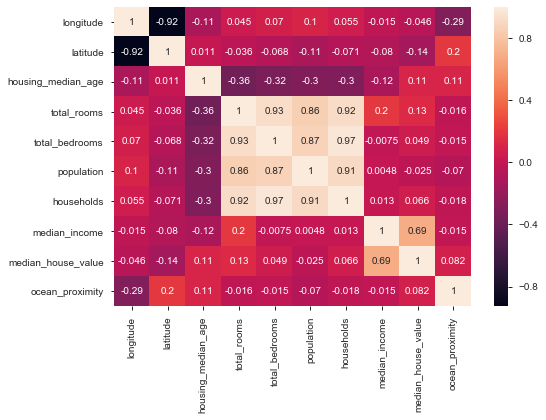

In [69]:
sns.heatmap(house.corr(),annot=True)

###  3.Encode categorical data :

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
labelencoder = LabelEncoder()
house['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
house["ocean_proximity"]= labelencoder.fit_transform(house['ocean_proximity'])
house["ocean_proximity"].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [19]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.642151,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,420.876678,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


### 4.Spliting the dataset into 80% train and 20% test dataset

In [20]:
X = house.drop("median_house_value",axis=1)

In [21]:
X.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3


In [22]:
Y = house['median_house_value']

In [23]:
Y.head(2)

0    452600.0
1    358500.0
Name: median_house_value, dtype: float64

In [24]:
Y.ndim

1

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [29]:
X_train.shape ,X_test.shape ,Y_train.shape ,Y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [30]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6649,-118.13,34.16,36.0,2162.0,658.0,1337.0,590.0,2.2095,0
5400,-118.43,34.03,26.0,1706.0,516.0,894.0,435.0,3.1875,0
18887,-122.24,38.11,52.0,2050.0,492.0,1277.0,463.0,3.0507,3
11264,-117.98,33.80,35.0,2114.0,341.0,1077.0,343.0,5.4876,0
1641,-121.81,37.97,8.0,1584.0,236.0,615.0,202.0,6.4753,1


### 5.Standardize the data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
independent_scalar = StandardScaler()

In [33]:
X_train = independent_scalar.fit_transform(X_train)
X_test = independent_scalar.transform(X_test)

In [34]:
X_test

array([[ 0.88165698, -0.83335299, -1.0045377 , ...,  0.27634836,
         1.01945619, -0.81999641],
       [-1.25838124,  0.95463158,  0.66239436, ..., -0.16298226,
        -0.90791621,  1.29625565],
       [ 0.83165608, -0.70195255, -0.29013825, ...,  0.66569525,
        -0.63271992, -0.81999641],
       ...,
       [ 0.68665349, -0.83335299,  0.10675034, ...,  1.40492821,
        -0.85352855,  2.00167301],
       [ 0.64665278, -0.65033095,  0.10675034, ..., -0.28662621,
         1.31519892, -0.81999641],
       [ 1.20666278, -0.74888128, -0.21076053, ...,  0.46576036,
         1.1981735 , -0.11457905]])

## 6.Linear Regression

In [35]:
M_linear = LinearRegression()

In [36]:
M_linear.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
M_linear.coef_

array([-85366.65431444, -90338.49084308,  14034.0453846 , -14311.98740039,
        31937.88044766, -43793.0456095 ,  30929.81806625,  75256.6210574 ,
          408.87956543])

In [38]:
M_linear.intercept_

206077.92290455414

In [39]:
y_pred = M_linear.predict(X_test)

In [40]:
y_pred

array([269411.9856707 , 163283.21621709, 132334.94298752, ...,
       189616.86510988, 305785.38591761, 251859.90321577])

In [41]:
test = pd.DataFrame({'Actual_value':Y_test,
                    'Predicted_value':y_pred})

In [42]:
test

,Actual_value,Predicted_value
10316,304900.0,269411.985671
763,166600.0,163283.216217
6111,117600.0,132334.942988
5479,326700.0,277358.493800
5877,250000.0,212713.010585
...,...,...
12850,80200.0,105606.508297
4751,165000.0,156880.906741
8056,151900.0,189616.865110
3381,277600.0,305785.385918


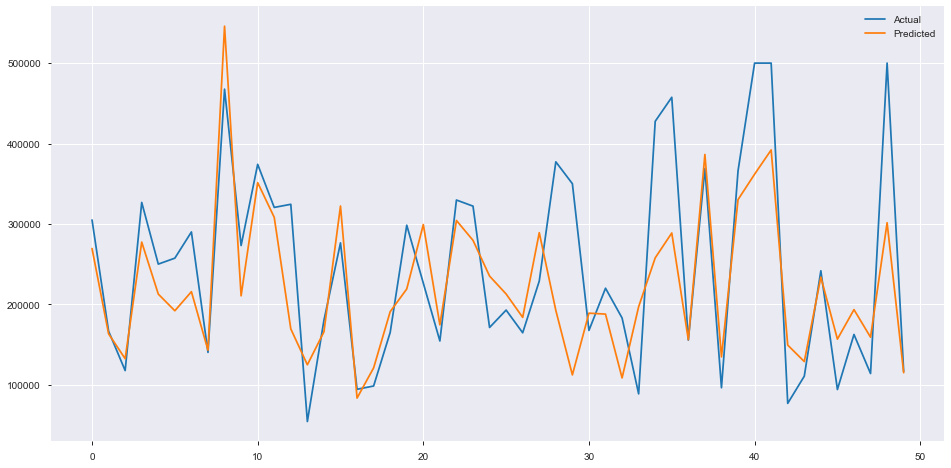

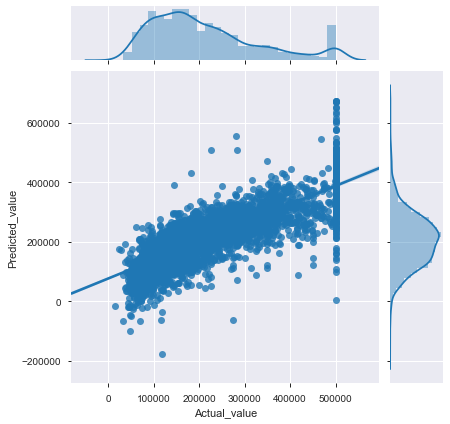

In [46]:
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual_value',y= 'Predicted_value',data=test,kind='reg')

In [52]:
print("Mean Squared error:",metrics.mean_squared_error(Y_test,y_pred))
print("Mean Absolute error:",metrics.mean_absolute_error(Y_test,y_pred))
print("Root Mean Squared error:",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Squared error: 4979683676.468803
Mean Absolute error: 51563.12598804298
Root Mean Squared error: 70566.87378982296


## 7.Decision Tree Regression

In [47]:
Dreg = DecisionTreeRegressor()

In [48]:
Dreg.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
Dreg_y_pred = Dreg.predict(X_test)

In [50]:
Dreg_y_pred

array([297900., 154300., 124100., ..., 141700., 273100., 226800.])

In [53]:
Dtest = pd.DataFrame({"Actual_value_D":Y_test,
                     'Predicted_value_D':Dreg_y_pred})

In [54]:
Dtest

,Actual_value_D,Predicted_value_D
10316,304900.0,297900.0
763,166600.0,154300.0
6111,117600.0,124100.0
5479,326700.0,344300.0
5877,250000.0,232000.0
...,...,...
12850,80200.0,118800.0
4751,165000.0,131700.0
8056,151900.0,141700.0
3381,277600.0,273100.0


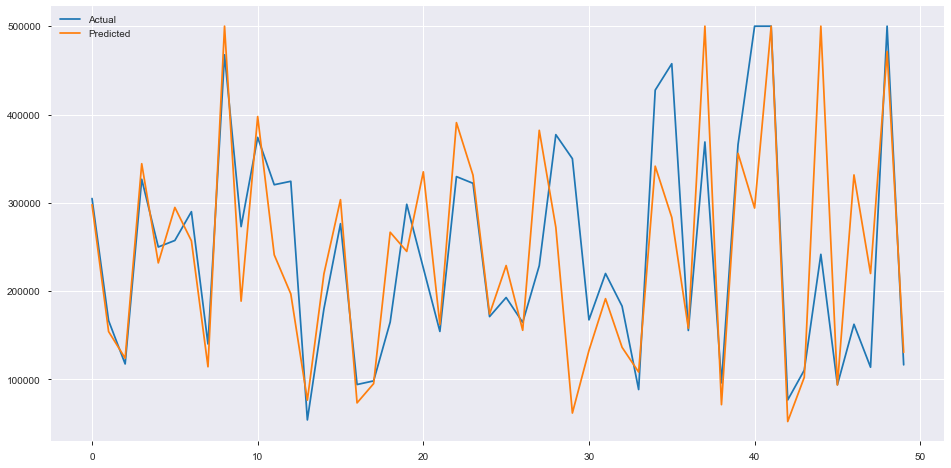

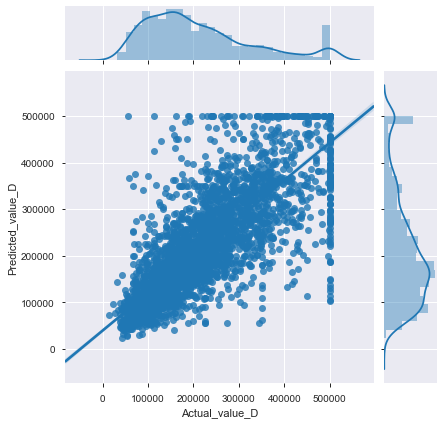

In [62]:
fig= plt.figure(figsize=(16,8))
Dtest = Dtest.reset_index()
Dtest = Dtest.drop(['index'],axis=1)
plt.plot(Dtest[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual_value_D',y='Predicted_value_D',data=Dtest,kind="reg")

In [63]:
print("Mean Squared error:",metrics.mean_squared_error(Y_test,Dreg_y_pred))
print("Mean Absolute error:",metrics.mean_absolute_error(Y_test,Dreg_y_pred))
print("Root Mean Squared error:",np.sqrt(metrics.mean_squared_error(Y_test,Dreg_y_pred)))

Mean Squared error: 4836829269.325097
Mean Absolute error: 44309.6351744186
Root Mean Squared error: 69547.31676581848


## 8.Random Forest Regression

In [64]:
rfReg = RandomForestRegressor()

In [65]:
rfReg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
rfReg_y_pred = rfReg.predict(X_test)

In [67]:
rfReg_y_pred

array([278220.  , 176269.  , 151969.  , ..., 186999.01, 334489.05,
       216678.  ])

In [68]:
rfrtest = pd.DataFrame({"Actual_value_R":Y_test,
                       "Predicted_value_R":rfReg_y_pred})

In [69]:
rfrtest

,Actual_value_R,Predicted_value_R
10316,304900.0,278220.00
763,166600.0,176269.00
6111,117600.0,151969.00
5479,326700.0,342460.07
5877,250000.0,274091.00
...,...,...
12850,80200.0,96225.00
4751,165000.0,164131.00
8056,151900.0,186999.01
3381,277600.0,334489.05


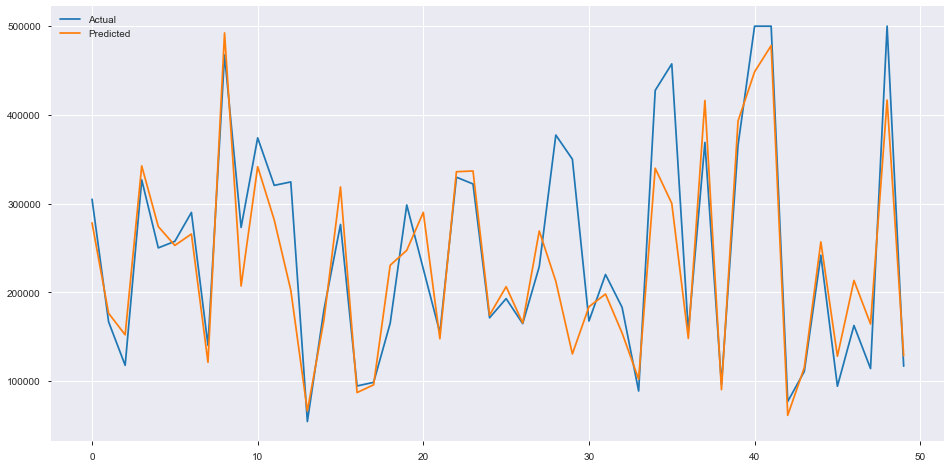

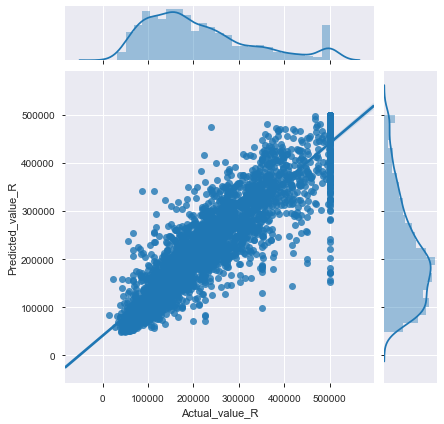

In [70]:
fig= plt.figure(figsize=(16,8))
rfrtest = rfrtest.reset_index()
rfrtest = rfrtest.drop(['index'],axis=1)
plt.plot(rfrtest[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual_value_R',y='Predicted_value_R',data=rfrtest,kind="reg")

In [71]:
print("Mean Squared error:",metrics.mean_squared_error(Y_test,rfReg_y_pred))
print("Mean Absolute error:",metrics.mean_absolute_error(Y_test,rfReg_y_pred))
print("Root Mean Squared error:",np.sqrt(metrics.mean_squared_error(Y_test,rfReg_y_pred)))

Mean Squared error: 2411316299.3520555
Mean Absolute error: 32329.821785368214
Root Mean Squared error: 49105.15552721583


## 9.Linear Regression with one independent variable

Extract median_income from X_train and x_test

In [72]:
Excol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]

In [74]:
X = X.drop(Excol,axis=1)

In [75]:
X.head()

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [76]:
X_train2,X_test2,Y_train2,Y_test2 =train_test_split(X,Y,test_size=0.2)

In [78]:
X_train2.shape , X_test2.shape, Y_train2.shape, Y_test2.shape

((16512, 1), (4128, 1), (16512,), (4128,))

In [79]:
M_linear2 = LinearRegression()

In [80]:
M_linear2.fit(X_train2,Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
y_pred2 = M_linear2.predict(X_test2)

In [82]:
y_pred2

array([292176.2428841 , 277743.32008346, 211972.82653034, ...,
       110497.63151401, 229216.81278342, 192068.81904016])

In [83]:
test2 = pd.DataFrame({"Actual_value_2":Y_test2,
                     "Predicted_value_2":y_pred2})

In [84]:
test2

,Actual_value_2,Predicted_value_2
17026,414800.0,292176.242884
4119,293900.0,277743.320083
18154,409700.0,211972.826530
19956,108100.0,221047.946303
16959,340500.0,168157.997226
...,...,...
19707,115200.0,228692.360647
20024,64600.0,116241.431315
9247,48000.0,110497.631514
13271,145600.0,229216.812783


Text(0, 0.5, ' Predicted median_house_value')

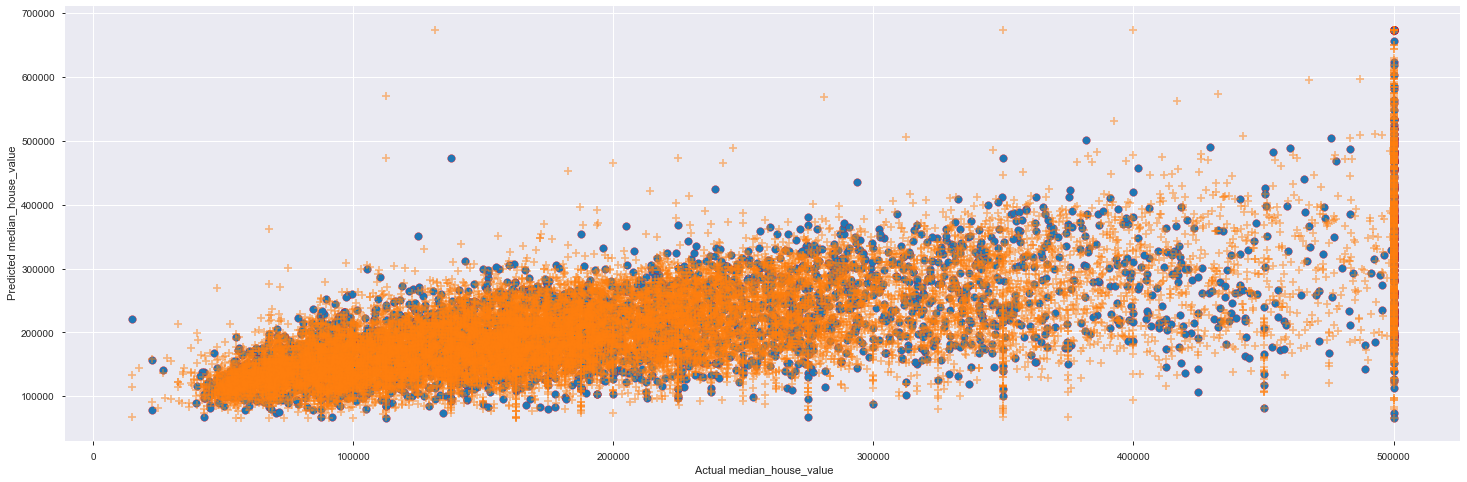

In [85]:
fig = plt.figure(figsize=(25,8))
plt.scatter(Y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(Y_train2,M_linear2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")